# Project Portfolio : Bank Churn Prediction Portfolio Project
Author: Malick H.B (TallBI Services)

## Introduction

Churn Prediction: Unveiling the Art of Customer Retention Through Data Science

In the dynamic landscape of modern business, customer retention stands as a paramount goal for companies across industries. The ability to anticipate when and why customers might part ways with a company is a valuable asset, enabling businesses to proactively address concerns and tailor strategies to foster lasting relationships. In this portfolio project, we delve into the world of churn prediction – the predictive prowess of machine learning to discern whether customers are poised to leave a financial institution.

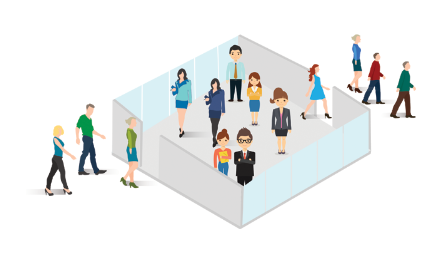

## Overview

Churn prediction is a compelling application of machine learning that involves sifting through data to predict whether customers will discontinue their engagement with a company. In this project, we focus our lens on a bank's clientele, aiming to construct a predictive model that effectively identifies customers on the brink of departure. By harnessing the power of data-driven insights, we equip ourselves with the means to foresee churn and devise strategic interventions that resonate with the diverse needs of our customer base.

## About the Dataset

The bedrock of our journey lies in a comprehensive dataset meticulously crafted to reflect the intricacies of customer behavior within a bank. This dataset is a treasure trove of attributes that have the potential to influence a customer's decision to part ways with the institution. Here, each record is imbued with significance, from fundamental characteristics like age, gender, and geography, to more nuanced indicators such as credit score, tenure, and product usage.

Let's briefly explore some of the key columns that furnish our dataset:

**CreditScore**: An individual's credit score can shed light on their financial stability, potentially impacting their propensity to leave the bank.

**Geography:** The geographic location of a customer might play a role in their decision to stay or leave.

**Age:** Younger customers might exhibit different patterns of churn compared to their older counterparts.

**Tenure**: The length of time a customer has been with the bank could signify their loyalty.

**Balance:** The balance in a customer's account is often indicative of their investment in the relationship.

**NumOfProducts:** The number of products a customer uses could offer insights into their engagement level.

**HasCrCard:** The presence of a credit card might influence a customer's attachment to the bank.

**IsActiveMember:** Active customers might be less inclined to churn.

**EstimatedSalary:** Income could be a determining factor in the decision to leave the bank.

**Exited:** The crux of our prediction – whether a customer has left the bank or not.

## Data Exploration and preprocessing

### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*No further splits with positive gain, best gain: -inf.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*Auto-choosing col-wise multi-threading.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*Auto-choosing row-wise multi-threading.*")


### Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/bank Churn prediction/churn.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Check the size of dataset
dataset.shape

(10000, 14)

In [6]:
# Check some information
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [7]:
# Check for missing values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

It seems there is no missing values in the dataset.

In [8]:
# Let's count the number of unique values in each column of the dataset that has a data type of 'object
dataset.select_dtypes(include='object').nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

We can see that "Surname" has 2932 unique values, "Geography" has 3 unique values, and "Gender" has 2 unique values.The "Surname" column appears to have a very high number of unique values (2932), which makes it less likely to contribute meaningful information for predictive modeling purposes.

We will remove "Surname" in our dataset.

In [9]:
dataset.drop(columns='Surname' , inplace=True)
dataset.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We could also remove the "RowNumber" column which  represents an index or identifier for the dataset .It's irrelevant for our modeling purposes.

In [10]:
dataset.drop(columns='RowNumber', inplace=True)
dataset.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Create a copy of dataset for future uses
data = dataset.copy()

In [12]:
# Basic statistical analysis
summary_statistics = dataset.describe()
summary_statistics

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##  Exploratory Data Analysis (EDA)

In [13]:
# Let's get the list of categorical variables
categorical_columns = dataset.select_dtypes(include=['object', 'int64'])
print(categorical_columns)

      CustomerId  CreditScore Geography  Gender  Age  Tenure  NumOfProducts  \
0       15634602          619    France  Female   42       2              1   
1       15647311          608     Spain  Female   41       1              1   
2       15619304          502    France  Female   42       8              3   
3       15701354          699    France  Female   39       1              2   
4       15737888          850     Spain  Female   43       2              1   
...          ...          ...       ...     ...  ...     ...            ...   
9995    15606229          771    France    Male   39       5              2   
9996    15569892          516    France    Male   35      10              1   
9997    15584532          709    France  Female   36       7              1   
9998    15682355          772   Germany    Male   42       3              2   
9999    15628319          792    France  Female   28       4              1   

      HasCrCard  IsActiveMember  Exited  
0        

In [14]:
for column in categorical_columns.columns:
    unique_values = categorical_columns[column].unique()
    num_unique = len(unique_values)
    print(f"Column '{column}' has {num_unique} unique values:")
    print(unique_values)
    print()


Column 'CustomerId' has 10000 unique values:
[15634602 15647311 15619304 ... 15584532 15682355 15628319]

Column 'CreditScore' has 460 unique values:
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 47

Based on the dataset we can clearly see the categorical Variables : 'Geography' ,'Gender' and 'NumOfProducts' , 'HasCrCard' , 'IsActiveMember' are categorical variables with discrete values .The column 'Exited' is also categorical and is our target.

In [15]:
columns_to_remove = ['Tenure', 'CustomerId', 'CreditScore', 'Exited', 'Age']
categorical_columns = [column for column in categorical_columns if column not in columns_to_remove]

In [16]:
categorical_columns

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

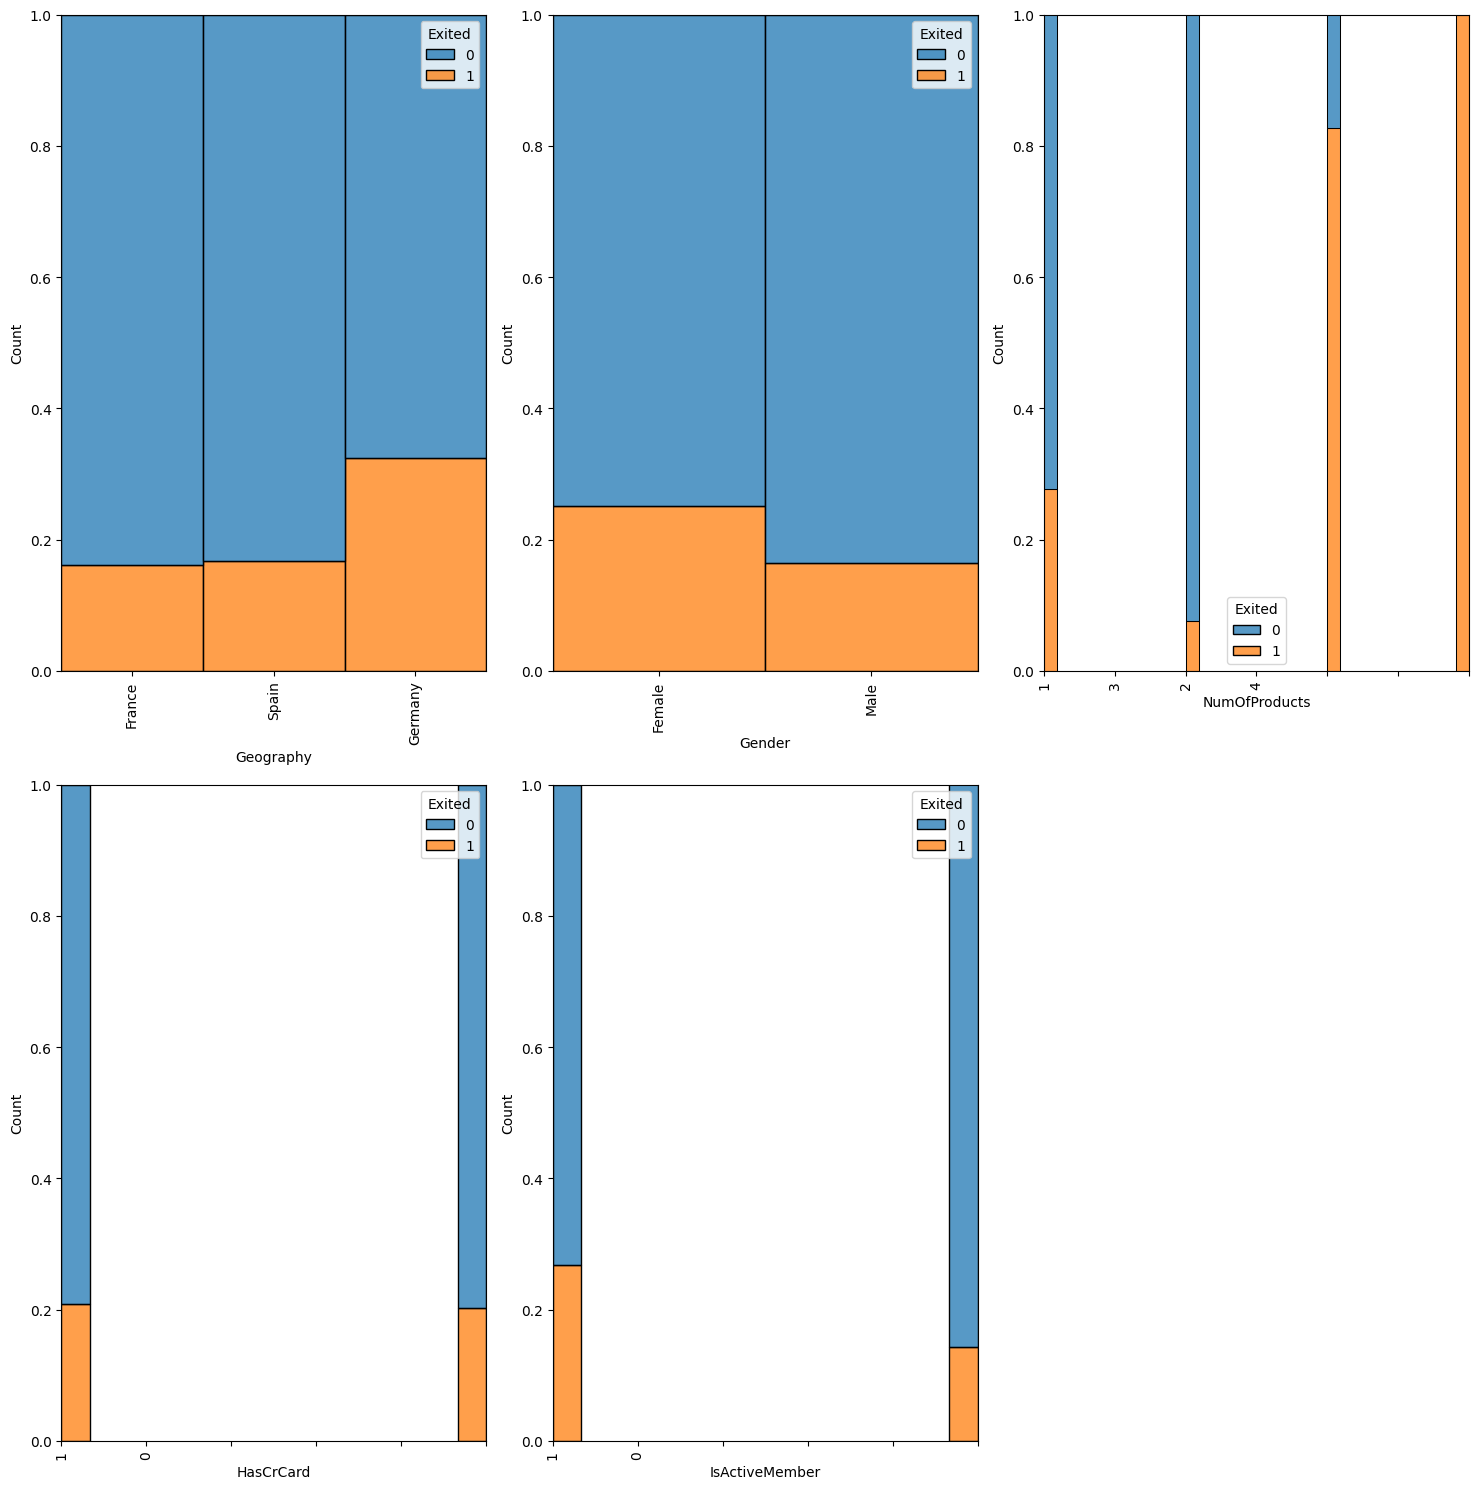

In [17]:
# Create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# Create histplot for the categorical variable
for i, column in enumerate(categorical_columns):
    sns.histplot(x=column, hue='Exited', data=dataset, ax=axs[i], multiple='fill', kde=False)
    axs[i].set_xticklabels(dataset[column].unique(), rotation=90)
    axs[i].set_xlabel(column)

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

plt.show()

### Observation and Analysis of Churn Pattern

In our exploration of customer churn, we've derived meaningful insights from various categorical variables within our dataset. These insights offer a glimpse into the complex interplay between different features and the likelihood of customers leaving the bank.

1. Geography:

The geographic location of customers appears to exert a notable influence on churn rates. Among the countries represented in our dataset:

Customers from Germany exhibit the highest churn rate at 30% (Exited = 1).
Customers from France demonstrate a moderate churn rate of 17.5% (Exited = 1).
Customers from Spain show a slightly higher churn rate at 18% (Exited = 1).
This suggests that location might play a role in determining customer loyalty, and there might be underlying factors unique to each country that contribute to these differences.

2. Gender:

Gender also emerges as a differentiating factor in churn rates. We observe the following trends:

Female customers have a churn rate of 25% (Exited = 1), indicating a moderate likelihood of leaving the bank.
Male customers show a slightly lower churn rate at 17.5% (Exited = 1), suggesting a relatively lower tendency to churn.
These gender-based disparities in churn rates could reflect varying preferences, needs, or experiences that impact customer retention.

3. Number of Products:

The number of products a customer utilizes from the bank unveils intriguing insights into churn behavior:

Customers with two products exhibit a high churn rate of 81.5% (Exited = 1), indicating that this particular segment has a substantial likelihood of leaving.
Customers using one product have a lower churn rate of 27.5% (Exited = 1), signifying a comparatively higher level of loyalty.
Customers with three products show a significantly lower churn rate at 7.5% (Exited = 1), suggesting that this group tends to remain committed.
Remarkably, customers using four products exhibit a 100% churn rate (Exited = 1), which necessitates further investigation into this category's unique dynamics.
These findings underscore the importance of tailoring retention strategies to different customer segments based on their product engagement.

4. Credit Card Ownership:

The presence or absence of a credit card seems to play a role in churn behavior:

Customers with a credit card (HasCrCard = 1) exhibit a churn rate of 21% (Exited = 1), indicating a moderate likelihood of leaving.
Customers without a credit card (HasCrCard = 0) show a similar churn rate of 20% (Exited = 1).
While the difference is not substantial, it suggests that credit card ownership might not be a significant driver of churn within this dataset.

5. Active Membership Status:

The status of being an active member unveils an interesting perspective on churn rates:

Active members (IsActiveMember = 1) display a churn rate of 27.5% (Exited = 1), indicating a noteworthy likelihood of churning.
Inactive members (IsActiveMember = 0) show a slightly lower churn rate of 17.5% (Exited = 1), suggesting a relatively lower propensity to churn.
This finding prompts us to delve deeper into the factors that drive customers to either remain active or become inactive members.

In [18]:
# Let's get the numerical columns
numerical_columns = ['CreditScore','Age', 'Tenure', "EstimatedSalary"]

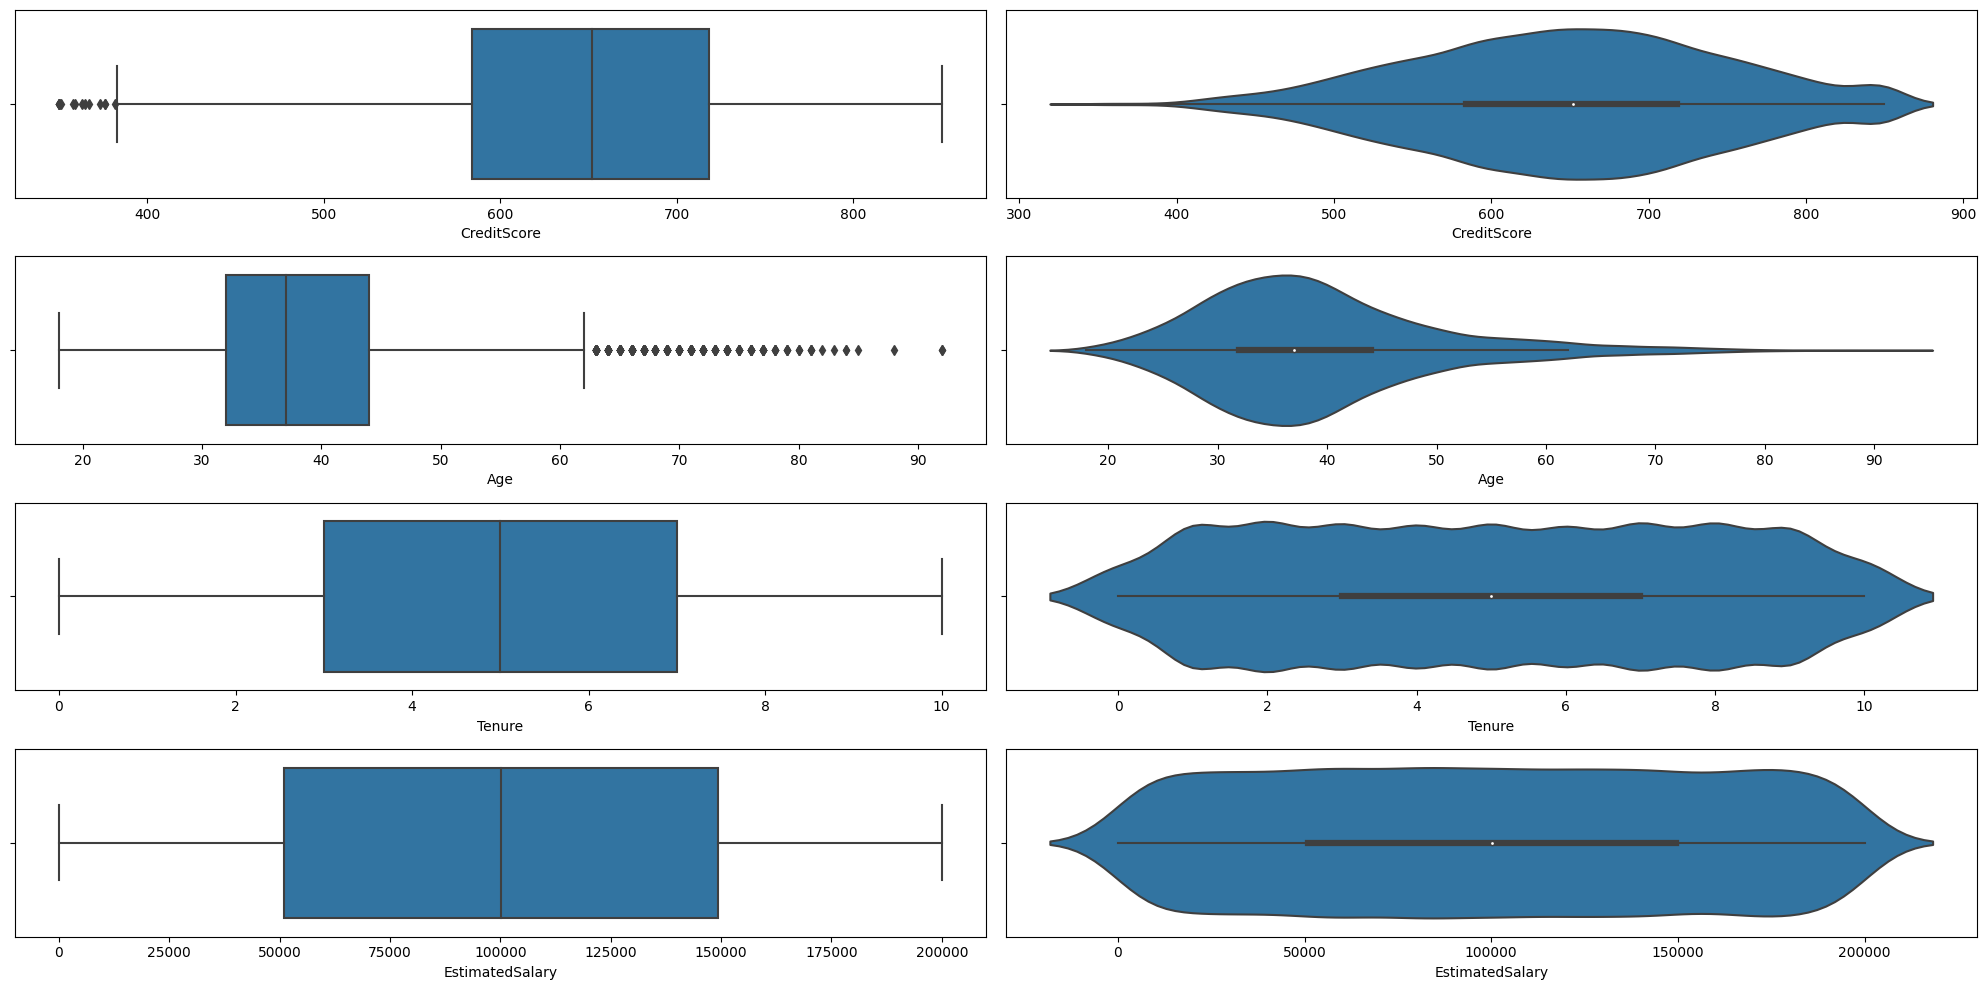

In [19]:
# Create figure with subplots
fig, axs = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(20, 10))

# Create box plots and violin plots for the numerical variables
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=dataset[column], ax=axs[i, 0])
    axs[i, 0].set_xlabel(column)

    sns.violinplot(x=dataset[column], ax=axs[i, 1])
    axs[i, 1].set_xlabel(column)

# Adjust spacing between subplots
fig.tight_layout()

plt.show()

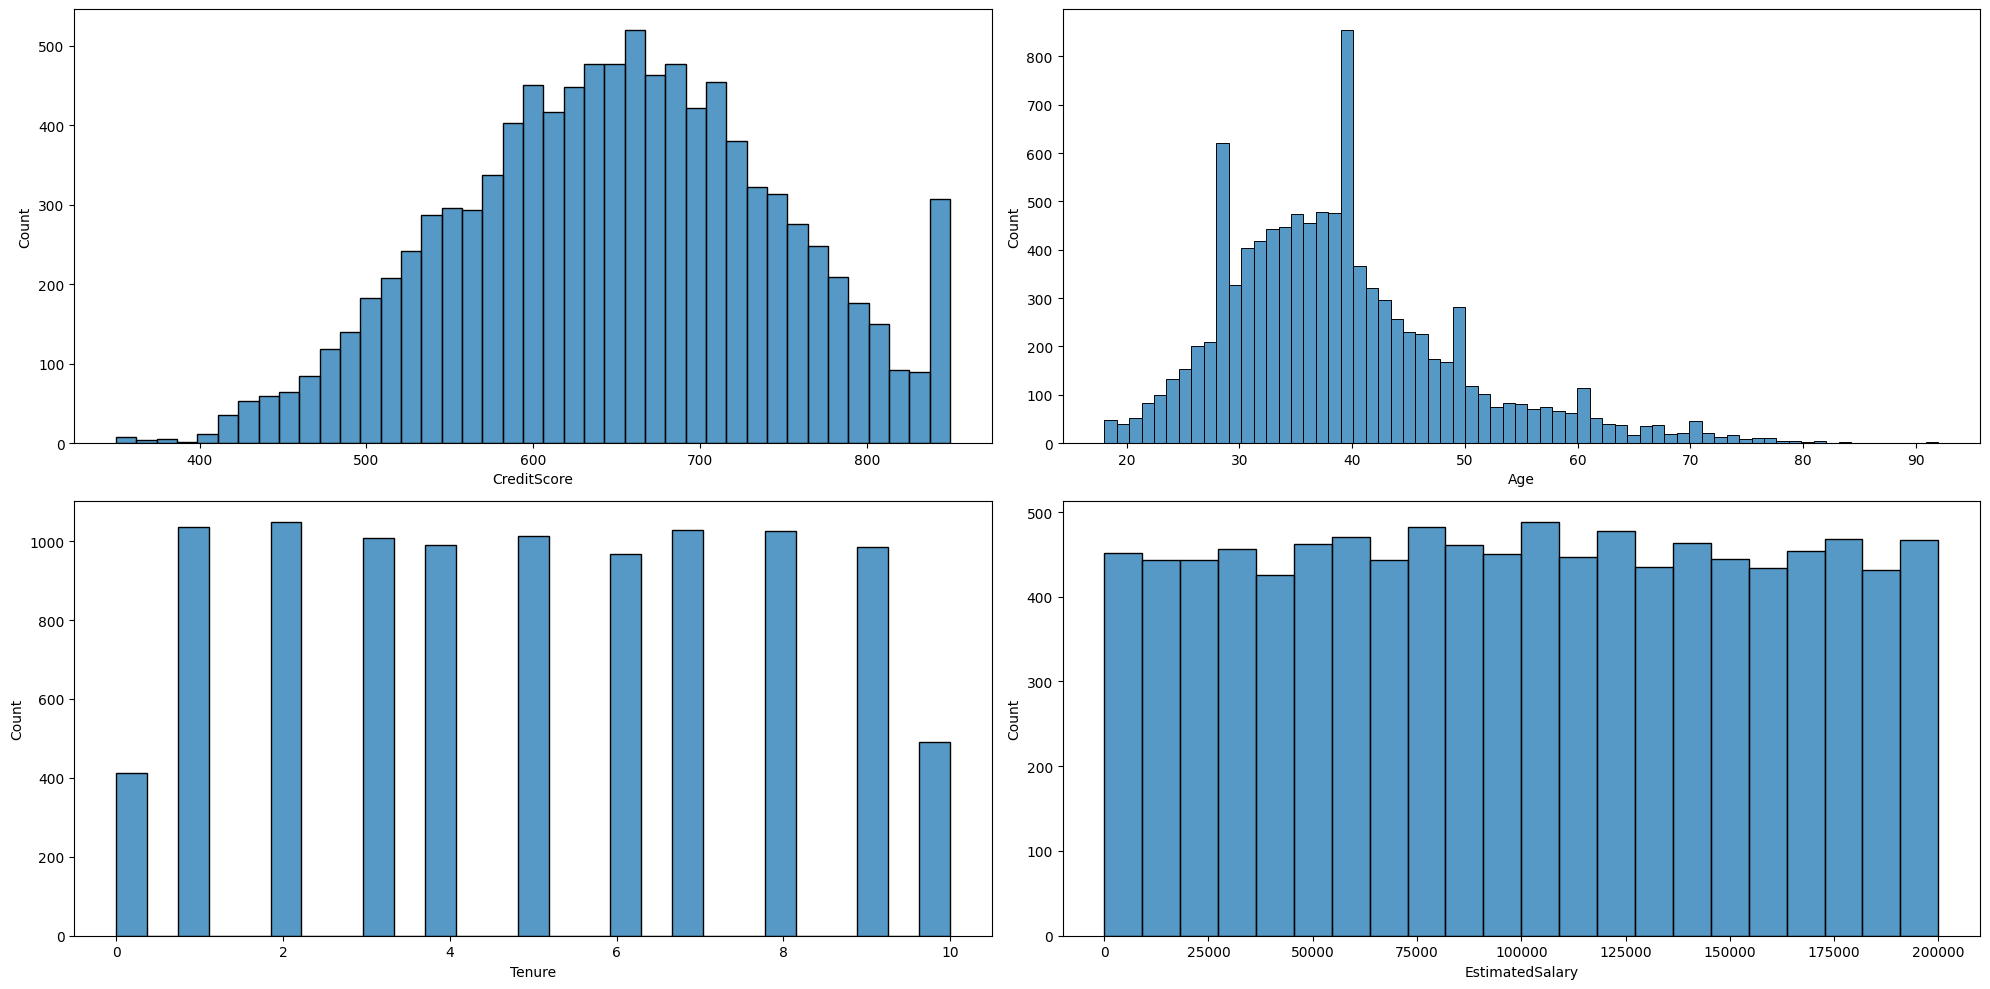

In [20]:
# Create figure with subplots
fig, axs = plt.subplots(nrows=len(numerical_columns) // 2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# Create histogram plots for the numerical variables
for i, column in enumerate(numerical_columns):
    sns.histplot(x=dataset[column], ax=axs[i])
    axs[i].set_xlabel(column)

# Adjust spacing between subplots
fig.tight_layout()

plt.show()

### Observation and Analysis of numerical columns

**CreditScore:**

The median credit score is 650. The median is an indicator of the central tendency of the data and is relatively unaffected by outliers.
The credit scores span a range of 500, indicating a considerable variability in the scores. This range suggests that there is diversity in customers' credit scores within the dataset.

**Age:**

The median age is 37. The median's position in relation to the box provides insights into the distribution's skewness.
The median being closer to the lower end of the box suggests that there is a concentration of younger customers in the dataset.
The presence of scattered data points on the right side of the median indicates that there's a notable dispersion of older customers, leading to a positively skewed distribution.
The range of age values is 74, signifying that the age of customers within the dataset spans this wide range.

**Tenure:**

The median tenure (number of years as a customer) is 5. This indicates the middle value of the distribution and provides a central point of reference.
The range of tenures is 10, suggesting that customers' tenure with the bank varies between 0 and 10 years. This indicates diverse customer relationships with the bank.

**EstimatedSalary:**

The median estimated salary is 100,000.  The median serves as a measure of central tendency, representing the middle value of the dataset.
The range of estimated salaries is $200,000, highlighting a substantial diversity in income levels within the dataset.

Let's see some scatter plot and check some relationship

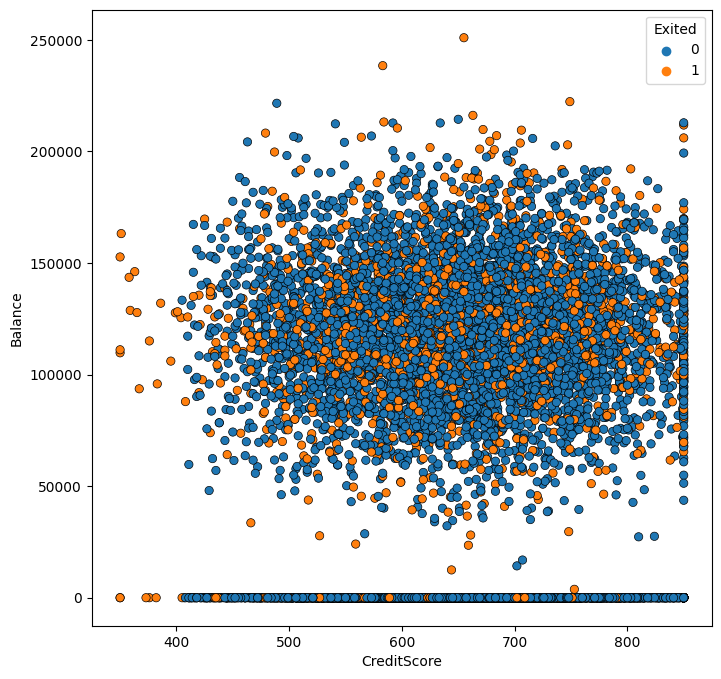

In [21]:
plt.figure(figsize=(8, 8), dpi=100)
sns.scatterplot(x="CreditScore", y="Balance", hue="Exited", data=dataset, edgecolor="black")
plt.show()

This scatter plot is an effective way to visualize the relationship between "CreditScore" and "Balance" while considering the "Exited" status.

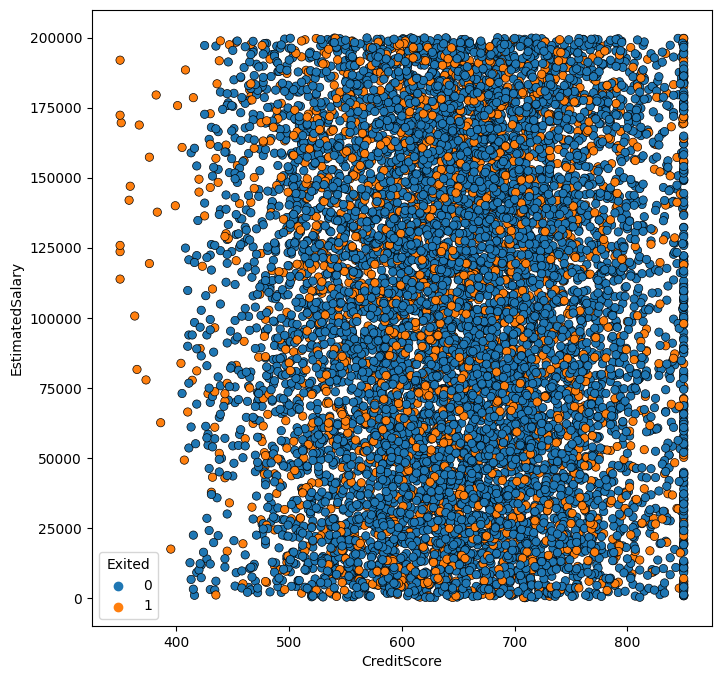

In [22]:
plt.figure(figsize=(8, 8), dpi=100)
sns.scatterplot(x="CreditScore", y="EstimatedSalary", hue="Exited", data=dataset, edgecolor="black")
plt.show()

In [23]:
dataset.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
# Let's Remove CustomedID because its irrelevant
dataset.drop(columns="CustomerId", inplace=True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature Engineering

In [25]:
# Creating new features
dataset['CreditScoreAboveMean'] = (dataset['CreditScore'] > dataset['CreditScore'].mean()).astype(int)
dataset['NumOfProductsLog'] = np.log1p(dataset['NumOfProducts'])

In [26]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreAboveMean,NumOfProductsLog
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.693147
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.693147
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1.386294
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1.098612
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0.693147


In [27]:
# Encoding Categorical variables
cat_vars = dataset.select_dtypes(include=['object']).columns

In [28]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder for each categorical variable
label_encoders = {col: LabelEncoder() for col in cat_vars}

for col, encoder in label_encoders.items():
    dataset[col] = encoder.fit_transform(dataset[col])
    unique_encoded_values = encoder.classes_
    print(f"{col}: {unique_encoded_values}")

Geography: ['France' 'Germany' 'Spain']
Gender: ['Female' 'Male']


In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Columns to be scaled
columns_to_scale = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_features = scaler.fit_transform(dataset[columns_to_scale])

# Assign the scaled features back to the dataset
dataset[columns_to_scale] = scaled_features


In [30]:
dataset.head()
print(dataset.shape)

(10000, 13)


### Remove Outliers
in the EDA step , there is seems to be outliers in the CreditScore and Age columns.We will try to remove them using the z-Score

In [31]:
from scipy import stats
def remove_outliers(dataset, cols, threshold=3):
    """
    Remove outliers from the dataset using the z-score method.

    Parameters:
    - dataset: pandas DataFrame
        The dataset containing the data.
    - cols: list
        List of column names for which outliers should be removed.
    - threshold: float
        The threshold value for the z-score. Data points with z-score greater
        than this threshold will be considered as outliers.

    Returns:
    - cleaned_dataset: pandas DataFrame
        A new dataset with outliers removed.
    """

    # Create a copy of the dataset
    cleaned_dataset = dataset.copy()

    # Loop through each column
    for col in cols:
        # Calculate the z-scores for the column
        z_scores = np.abs((cleaned_dataset[col] - cleaned_dataset[col].mean()) / cleaned_dataset[col].std())

        # Remove rows with z-scores greater than the threshold
        cleaned_dataset = cleaned_dataset[z_scores <= threshold]

    return cleaned_dataset

cols=["CreditScore", "Age"]
clean_dataset = remove_outliers(dataset, cols)
print(clean_dataset.shape)

(9859, 13)


### Correlation heatmap

<Axes: >

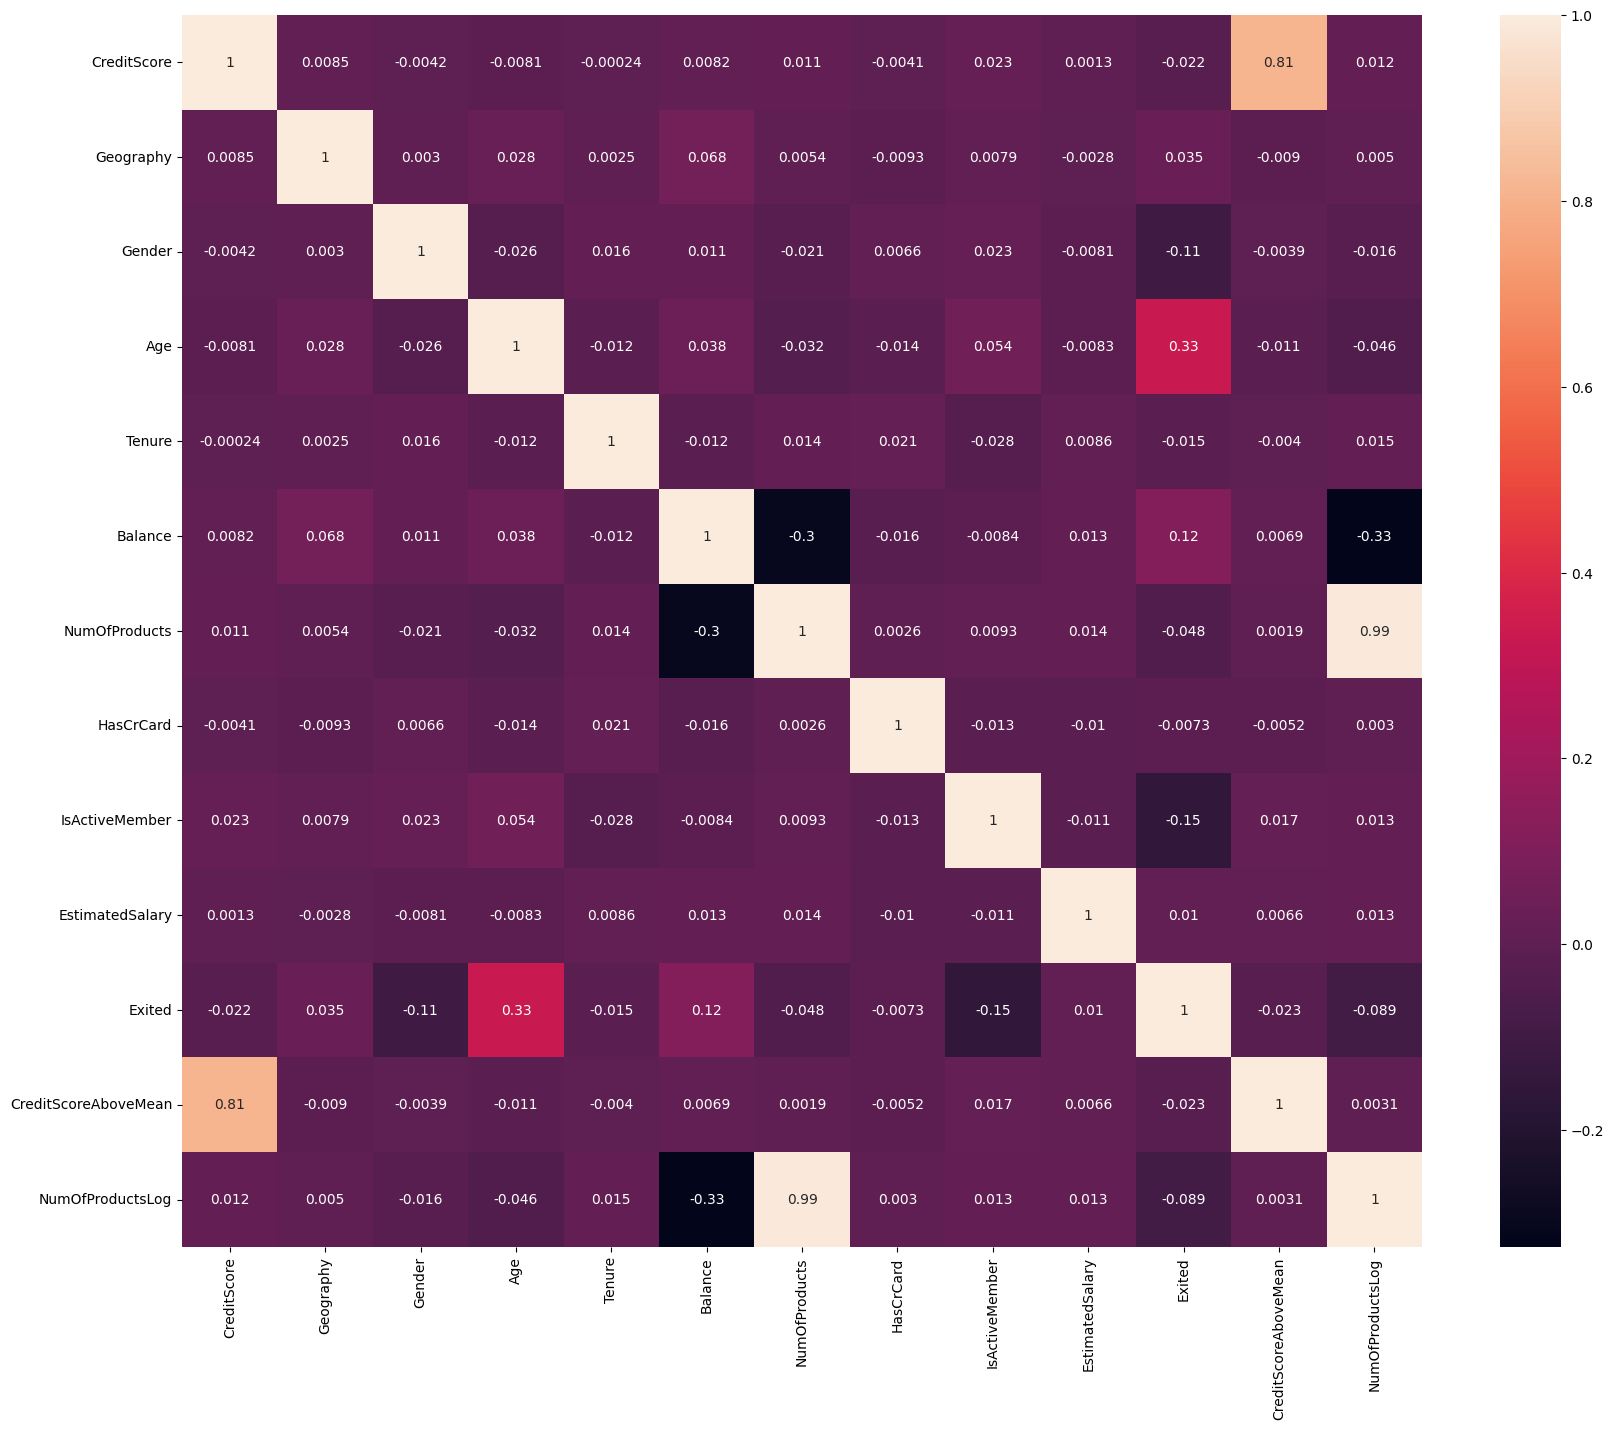

In [32]:
# Correlation Heatmap
plt.figure(figsize=(20,16))
sns.heatmap(clean_dataset.corr(), fmt='.2g', annot=True)

## Modeling

### Splitting the dataset into Training set and Testing set

In [33]:
from sklearn.model_selection import train_test_split

X = clean_dataset.drop('Exited', axis=1)
y = clean_dataset['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreAboveMean,NumOfProductsLog
4430,-0.646971,2,1,1.914528,4,-1.225848,2,1,1,-1.263395,0,1.098612
8337,-1.205697,0,1,0.198164,9,-1.225848,2,1,0,-1.499261,0,1.098612
6117,2.063884,2,1,-0.183251,2,-1.225848,2,1,0,0.345689,1,1.098612
5707,0.987819,0,1,-1.327494,9,-1.225848,2,0,1,-0.197570,1,1.098612
7026,0.273892,0,0,-1.136786,2,-1.225848,2,0,1,0.253804,1,1.098612


### Training the models and prediction

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_predict



# Create a list of models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Gradient Boost", GradientBoostingClassifier()),
    ("Light GBM", LGBMClassifier())
]

# Loop through each model
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=123456)

    # Perform KFold cross-validation and get predicted labels
    y_pred_cv = cross_val_predict(model, X, y, cv=kfold)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred_cv)

    # Print classification report
    report = classification_report(y, y_pred_cv)

    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)
    print("\n")


Logistic Regression:
Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      7841
           1       0.69      0.28      0.39      2018

    accuracy                           0.83      9859
   macro avg       0.77      0.62      0.65      9859
weighted avg       0.81      0.83      0.80      9859



Random Forest:
Accuracy: 0.8605
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      7841
           1       0.76      0.46      0.58      2018

    accuracy                           0.86      9859
   macro avg       0.82      0.71      0.75      9859
weighted avg       0.85      0.86      0.85      9859



SVM:
Accuracy: 0.8251
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7841
           1       0.94      0.16      0.27      2018

    accuracy                           0.83      9859
   macro avg       0.88      0.5

### Hyperparameter Tuning

Hyperparameter tuning for Random Forest

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=123456), param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123456),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

Hyperparameter tuning for Gradient Boost

In [37]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=123456), param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123456),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

Hyperparameter tuning for Light GBM

In [38]:
param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_lgbm = GridSearchCV(LGBMClassifier(random_state=123456), param_grid_lgbm, cv=5, scoring='roc_auc')
grid_lgbm.fit(X_train, y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=123456),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

Best models and Feature Importance

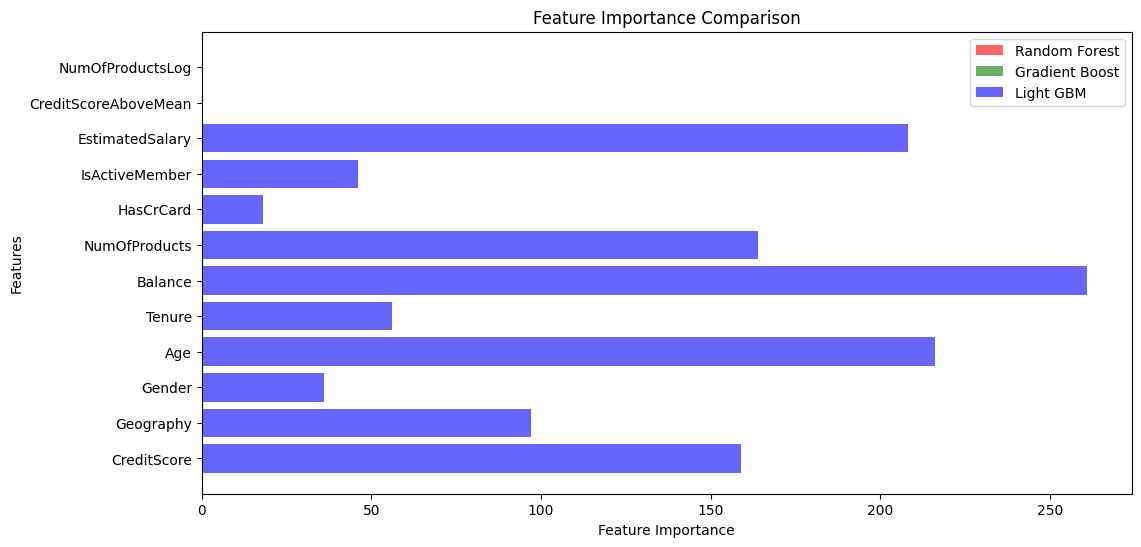

In [39]:
# Feature Importance for Random Forest
best_rf = grid_rf.best_estimator_
importances_rf = best_rf.feature_importances_

# Feature Importance for Gradient Boost
best_gb = grid_gb.best_estimator_
importances_gb = best_gb.feature_importances_

# Feature Importance for Light GBM
best_lgbm = grid_lgbm.best_estimator_
importances_lgbm = best_lgbm.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(X_train.columns, importances_rf, color='r', alpha=0.6, label='Random Forest')
plt.barh(X_train.columns, importances_gb, color='g', alpha=0.6, label='Gradient Boost')
plt.barh(X_train.columns, importances_lgbm, color='b', alpha=0.6, label='Light GBM')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Comparison')
plt.legend()
plt.show()

AUC-ROC Curves

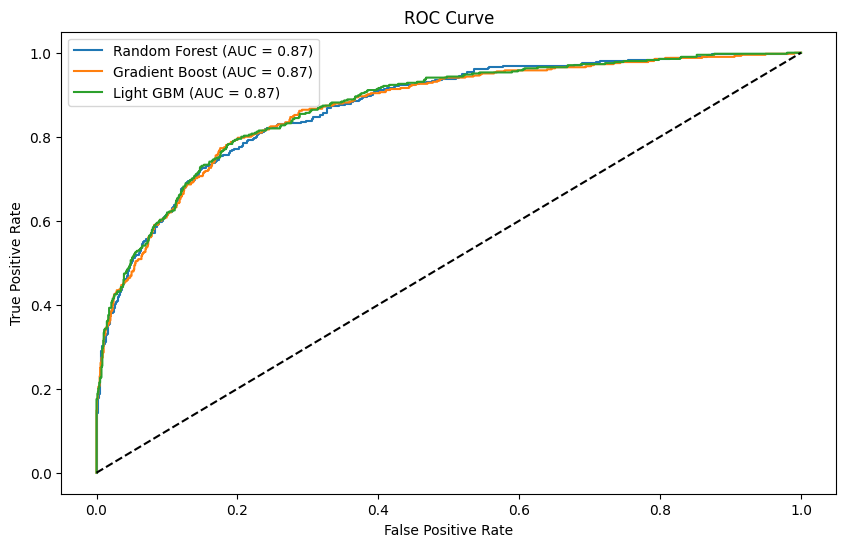

In [40]:


# AUC-ROC Curves
plt.figure(figsize=(10, 6))

# Random Forest
y_pred_rf_proba = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Gradient Boost
y_pred_gb_proba = best_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)
auc_gb = roc_auc_score(y_test, y_pred_gb_proba)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boost (AUC = {auc_gb:.2f})')

# Light GBM
y_pred_lgbm_proba = best_lgbm.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_lgbm_proba)
auc_lgbm = roc_auc_score(y_test, y_pred_lgbm_proba)
plt.plot(fpr_lgbm, tpr_lgbm, label=f'Light GBM (AUC = {auc_lgbm:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Observation and Analysis

Based on our plots ,if we took by example the Light GBM model:

Balance(265) seems to be the most important feature according . This suggests that customers' account balances play a significant role in determining whether they will churn or not. Customers with higher account balances may be less likely to leave the bank.

Age (212) is the second most important feature. This suggests that age has a significant impact on customer churn. Older customers might be more loyal and less likely to leave the bank compared to younger customers.

NumOfProducts (162) that a customer has purchased through the bank is also important. Customers with more products might have a stronger connection with the bank, potentially reducing their likelihood of churning.

EstimatedSalary (206) is another important feature. This indicates that customers' salary levels can influence their decision to leave the bank. Customers with higher salaries might be more stable and less likely to churn.
CreditScore (156):

Credit score is also among the important features. A higher credit score may indicate a customer's financial stability and responsibility, making them less likely to churn.
In summary, the feature importance scores align with intuitive expectations. Factors such as account balance, age, number of products, estimated salary, and credit score play a crucial role in predicting customer churn. These insights can help the bank take targeted actions to retain customers, such as offering tailored products or services to address their specific needs.

## Conclusion

In this portfolio, I embarked on a journey to unravel the complexities of customer churn prediction within the banking industry. Through a comprehensive analysis of the Kaggle Bank Churn Prediction dataset, I harnessed the power of data science to provide valuable insights and predictive models that can aid in retaining valuable customers.

Beginning with data preprocessing, I meticulously prepared the dataset by addressing missing values, encoding categorical variables, and scaling features to ensure a clean and robust foundation. By delving into exploratory data analysis, I uncovered key patterns and trends that shed light on customer behavior and highlighted potential influencing factors.

Building on this foundation, I crafted predictive models using a range of algorithms including Logistic Regression, Random Forest, SVM, Gradient Boost, and Light GBM. Rigorous evaluation of these models enabled me to gauge their performance and select the best candidates for predicting customer churn accurately.

Through this portfolio, I not only honed my data analysis and machine learning skills but also developed a profound understanding of the intricacies involved in churn prediction and customer retention. By presenting a comprehensive analysis alongside insightful visualizations, I aim to contribute to the realm of data-driven decision-making, ultimately assisting businesses in their pursuit of customer-centric strategies.

As I continue to evolve in my data science journey, I am excited to tackle more complex challenges and make meaningful contributions to various domains using data-driven insights.

Malick Hamidou --LinkedIn :[HERE](https://www.linkedin.com/in/malick-hamidou-boureima-363708183/)

Malick Hamidou --Github   :[HERE](https://github.com/Molotovsefyu49)